<a href="https://colab.research.google.com/github/marycarmenvv/Modulo2_AnalisisYReporte_A00828570/blob/main/Final_Modulo2_AnalisisYReporte_A00828570.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)**
# María del Carmen Vargas Villarreal A00828570


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
from matplotlib import pyplot


Cargamos data set "Wine"

In [2]:
import pandas as pd # importar libreria

columns = ["Classification", "Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols"
 	,"Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copia de wine.data', names= columns).reset_index()
df1 = df1.drop(['index'], axis=1) # abrir el archivo de datos con los nombres dados para las columnas
df1.head() 

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1. Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).

In [3]:
df1['Classification']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

In [4]:
df1.Classification.unique()


array([1, 2, 3])

In [5]:
df_x = df1.drop(["Classification"], axis=1)
df_y = df1["Classification"]

df_x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df_y
#df_y.values.tolist()

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

In [7]:
df_y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

Separamos en train, test y validation set

In [8]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10


X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_ratio)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("X_valid : ",X_valid.shape) # Usar test de validación para hacer las pruebas necesarias 
# para mejorar el modelo. Hasta el final, se usa el set de prueba. 



X_train :  (142, 13)
X_test :  (18, 13)
X_valid :  (18, 13)


# Implementación de modelo Decision Trees (**`Antes`** de aplicar ajuste de parámetros para mejorar el desempeño)

In [9]:
classifier = tree.DecisionTreeClassifier(criterion='gini') 

# Train Decision Tree Classifer
classifier = classifier.fit(X_train, y_train)


# Grado de Bias y Overfitting/Underfitting

**Se debe asegurar que el modelo no sobreajuste ni subajuste los datos. Esto se puede hacer calculando la puntuación del Accuracy de los datos del tren y de la prueba. Si los valores son comparables, entonces el modelo no se está sobreajustando.**

**Para ver si hay overfitting o underfitting en el set de *TRAINING* obtenemos la métrica Accuracy que evalúa la predicción del modelo**

In [10]:
test_pred_train = classifier.predict(X_train)


print("Accuracy del data set de entrenamiento:" )

metrics.accuracy_score(y_train, test_pred_train)  

Accuracy del data set de entrenamiento:


1.0

In [11]:
print("Error rate del data set de entrenamiento: " )
1-metrics.accuracy_score(y_train, test_pred_train)  


Error rate del data set de entrenamiento: 


0.0

**Para ver si hay overfitting o underfitting en el set de *VALIDACIÓN* obtenemos la métrica Accuracy que evalúa la predicción del modelo**

In [12]:
test_pred_valid = classifier.predict(X_valid) 

print("Accuracy del data set de validación: " )

metrics.accuracy_score(y_valid, test_pred_valid)

Accuracy del data set de validación: 


0.9444444444444444

In [13]:
print("Error rate del data set de validación: " )
1-metrics.accuracy_score(y_valid, test_pred_valid)


Error rate del data set de validación: 


0.05555555555555558

Se puede observar que no hay overfitting en el modelo ya que tanto el Accuracy del set de entrenamiento como el de set de validación son muy cercanos. Es decir, no ocurrió el escenario en el que obtiene un buen rendimiento en el training set pero un bajo desempeño en el validation set. 


Tampoco es de tipo overfitting ya que sí hace un buen trabajo prediciendo con datos nuevos. 

Se puede decir entonces que tiene bias equilibrado, y una varianza moderada. Claro que, no se descarta el hecho de que los Decision Trees tienen al overfitting (los cuales son conducidos por una varianza alta), a lo contrario del underfitting (donde el nivel del Bias es muy alto; el promedio de la diferencia del valor pedicho del actual es muy alto; no encuentra patrones)


**Para visualizar los valores actuales vs predicciones**

In [14]:
test_pred_valid_list = test_pred_valid.tolist()
y_valid_list = y_valid.tolist()

In [15]:
for i in range(len(test_pred_valid)):
  print('Real: ',y_valid_list[i],' | Pred: ', test_pred_valid_list [i])

Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  3  | Pred:  3
Real:  1  | Pred:  1
Real:  3  | Pred:  3
Real:  1  | Pred:  1
Real:  3  | Pred:  3
Real:  3  | Pred:  3
Real:  2  | Pred:  1
Real:  1  | Pred:  1
Real:  2  | Pred:  2
Real:  3  | Pred:  3
Real:  3  | Pred:  3
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  3  | Pred:  3
Real:  1  | Pred:  1


In [16]:
#sns.pairplot(df1)

# Grado de variabilidad

**Para checar el grado de variabilidad, sigue evaluar el desempeño del modelo Decision Tree en sets de entrenamiento y prueba con diferentes valores del parámetro max_depth**

>1, train: 0.718, test: 0.667
>2, train: 0.923, test: 0.889
>3, train: 0.972, test: 0.944
>4, train: 0.986, test: 0.889
>5, train: 1.000, test: 0.889
>6, train: 1.000, test: 0.944
>7, train: 1.000, test: 0.944
>8, train: 1.000, test: 0.889
>9, train: 1.000, test: 0.833
>10, train: 1.000, test: 0.944


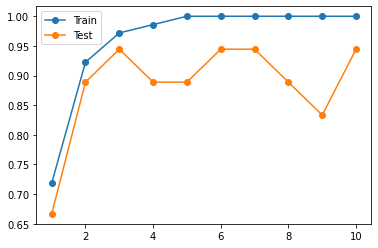

In [17]:
# Se definen listas para guardar la métrica "accuracy score" para el set de entrenamiento y prueba 
# correspondientes
train_scores, test_scores = list(), list()

# Se definen las profundidades del árbol para evaluar, en este caso que sean 10
profundidades = [i for i in range(1, 11)]

# Función for para evaluar el árbol de decisión para cada profundidad 
for i in profundidades:
	model = DecisionTreeClassifier(max_depth=i) # Va a recorrer las 10 iteraciones
	model.fit(X_train, y_train)
 
 	# Evaluación del dataset de entrenamiento  
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
 
	# Evaluación del dataset de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
 
	# Resumen que imprima el número de profundidad, accuracy del set de entrenamiento y accuracy del set de prueba
	print('>%d, train: %.3f, test: %.3f'%(i, train_acc, test_acc))
 
# Plot del Accuracy de entrenamiento y prueba vs profundidades del Decision Tree 
pyplot.plot(profundidades, train_scores, '-o', label='Train')
pyplot.plot(profundidades, test_scores, '-o', label='Test')

pyplot.legend()
pyplot.show()

**Mismo proceso pero añadiendo el "Error rate"**

>%d, train: %.3f, test: %.3f, error_ratio: %.3f (1, 0.7183098591549296, 0.6666666666666666, [0.33333333333333337])
>%d, train: %.3f, test: %.3f, error_ratio: %.3f (2, 0.9225352112676056, 0.8888888888888888, [0.33333333333333337, 0.11111111111111116])
>%d, train: %.3f, test: %.3f, error_ratio: %.3f (3, 0.971830985915493, 0.8333333333333334, [0.33333333333333337, 0.11111111111111116, 0.16666666666666663])
>%d, train: %.3f, test: %.3f, error_ratio: %.3f (4, 0.9859154929577465, 0.8888888888888888, [0.33333333333333337, 0.11111111111111116, 0.16666666666666663, 0.11111111111111116])
>%d, train: %.3f, test: %.3f, error_ratio: %.3f (5, 1.0, 0.8888888888888888, [0.33333333333333337, 0.11111111111111116, 0.16666666666666663, 0.11111111111111116, 0.11111111111111116])
>%d, train: %.3f, test: %.3f, error_ratio: %.3f (6, 1.0, 0.9444444444444444, [0.33333333333333337, 0.11111111111111116, 0.16666666666666663, 0.11111111111111116, 0.11111111111111116, 0.05555555555555558])
>%d, train: %.3f, test: %.

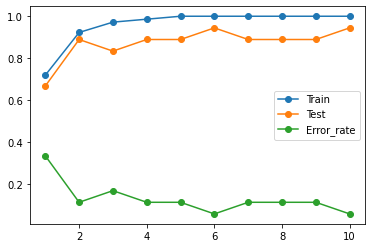

In [18]:
# Se definen listas para guardar la métrica "accuracy score" para el set de entrenamiento y prueba 
# correspondientes, y también la lista para guardar el Error rate entre las predicciones
train_scores, test_scores, error_rate = list(), list(), list()

# Se definen las profundidades del árbol para evaluar, en este caso que sean 10
profundidades = [i for i in range(1, 11)]

# Función for para evaluar el árbol de decisión para cada profundidad 
for i in profundidades:
	model = DecisionTreeClassifier(max_depth=i) # Va a recorrer las 10 iteraciones
	model.fit(X_train, y_train)
 
 	# Evaluación del dataset de entrenamiento  
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
 
	# Evaluación del dataset de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	error_rate_test = 1-accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	error_rate.append(error_rate_test)
 
	# Resumen que imprima el número de profundidad, accuracy del set de entrenamiento y accuracy del set de prueba
	print('>%d, train: %.3f, test: %.3f, error_ratio: %.3f',(i, train_acc, test_acc, error_rate))
 
# Plot del Accuracy de entrenamiento y prueba vs profundidades del Decision Tree 
pyplot.plot(profundidades, train_scores, '-o', label='Train')
pyplot.plot(profundidades, test_scores, '-o', label='Test')
pyplot.plot(profundidades, error_rate, '-o', label='Error_rate')

pyplot.legend()
pyplot.show()

Como se observa, el modelo de Decision Tree obtiene un buen Accuracy de 0.985 al llegar una max_depth = 4, de la cual se observa poca variabilidad con los siguientes valores ya que son muy parecidos e intermitentes. Además, el Error rate es bastante bajo, por debajo de 0.2

Si seleccionamos el valor de max_depth = 4, ahorramos costo computacional no teniendo que utilizar el valor de profundidad de 10 o más, y con un Accuracy aceptable. 

**Podemos `repetir el mismo proceso`, pero ahora `cambiando solamente los tamaños del set de prueba (test size)`, y checar que tanto varía la predicción del modelo según las distintas particiones, de las cuales las más comunes son las siguientes:**

* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50%



(Por fines prácticos, se utilizará el set de prueba en lugar del de validación)

>0, train: 1.000, test: 0.944
>1, train: 1.000, test: 0.881
>2, train: 1.000, test: 0.933


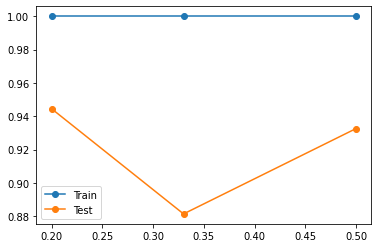

In [19]:
# Particiones
test_sizes = [0.2, 0.33, 0.5]


# Se definen listas para guardar la métrica "accuracy score" para el set de entrenamiento y prueba 
# correspondientes
train_scores, test_scores = list(), list()

test_sizes_values = [i for i in range(len(test_sizes))]

# Función for para evaluar el árbol de decisión para cada test_size 
for i in range(len(test_sizes_values)):

  X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_sizes[i])

  model = DecisionTreeClassifier(criterion = 'gini')
  model.fit(X_train, y_train)

	# Evaluación del dataset de entrenamiento  
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)

	# Evaluación del dataset de prueba
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)

	# Resumen que imprima el número de test_size, accuracy del set de entrenamiento y accuracy del set de prueba
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# Plot del Accuracy de entrenamiento y prueba vs profundidades del Decision Tree 
pyplot.plot(test_sizes, train_scores, '-o', label='Train')
pyplot.plot(test_sizes, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Para este caso, se observa variabilidad en términos del desempeño del modelo con el cambio de particiones de los datasets, que realmente no es una gran diferencia pero se puede llegar a observar un ligero cambio en el valor de Accuracy para cada una, donde la mejor opción corresponde al 20% de set de prueba y 80% de set de entrenamiento.

La variabilidad es moderada, de hecho es poca. Interpretando la tercera partición correspondiente a 50% y 50%, tiene sentido que tenga un valor tan alto para Accuracy debido a que el modelo aprendió con una suficiente cantidad de datos, lo cual puede llegar a ser perjudicial más que un logro. 

# Mejoramiento del modelo implementando los resultados obtenidos

Test size de 0.2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)


Profundidad de 4

In [22]:
classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth = 4) 

# Train Decision Tree Classifer
classifier = classifier.fit(X_train, y_train)


In [23]:
test_pred_mejorado = classifier.predict(X_valid) 

print("Accuracy del data set de validación: " )

metrics.accuracy_score(y_valid, test_pred_mejorado)

Accuracy del data set de validación: 


1.0

A continuación se muestran adicionalmente algunas descripciones con sus respectivas fuentes de información.

# **Para aumentar la precisión de la Predicción, necesitamos tener un modelo de baja varianza y bajo sesgo. Sin embargo, no podemos lograr esto debido a lo siguiente:**




# **Disminuir la varianza aumentará el sesgo.**

# **Disminuir el sesgo aumentará la varianza**

# 2. Diagnóstico y explicación el grado de bias o sesgo: Bajo, medio o alto


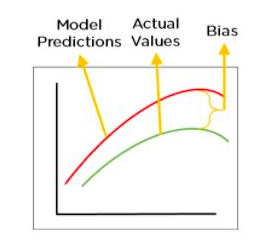

Bias o sesgo es la diferencia entre la predicción promedio de nuestro modelo y el valor correcto que estamos tratando de predecir.\
El modelo con alto sesgo presta muy poca atención a los datos de entrenamiento y simplifica demasiado el modelo. Siempre conduce a un alto error en los datos de entrenamiento y prueba.
Fuente: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

Cuando el sesgo es alto, las suposiciones hechas por nuestro modelo son demasiado básicas, el modelo no puede capturar las características importantes de nuestros datos. Esto significa que nuestro modelo no ha capturado patrones en los datos de entrenamiento y, por lo tanto, tampoco puede funcionar bien en los datos de prueba. Si este es el caso, nuestro modelo no puede funcionar con datos nuevos y no puede enviarse a producción.

Esta instancia, en la que el modelo no puede encontrar patrones en nuestro conjunto de entrenamiento y, por lo tanto, falla tanto para los datos visibles como para los no visibles, se denomina subajuste.
Fuente: https://www.simplilearn.com/tutorials/machine-learning-tutorial/bias-and-variance

High Bias can be identified when we have:

* High training error (higher than acceptable test error)
* Test error is almost same as training error



https://medium.com/analytics-vidhya/difference-between-bias-and-variance-in-machine-learning-fec71880c757

High Bias is due to a simple model. Consider the following to reduce High Bias:

* Use more complex model (Ex: add polynomial features)
* Increase input features
* Decrease Regularization term


# 3. Diagnóstico y explicación el grado de varianza: Bajo, medio o alto

La varianza es la variabilidad de la predicción del modelo para un punto de datos dado o un valor que nos indica la dispersión de nuestros datos. El modelo con alta varianza presta mucha atención a los datos de entrenamiento y no generaliza sobre los datos que no ha visto antes. Como resultado, estos modelos funcionan muy bien con los datos de entrenamiento, pero tienen altas tasas de error con los datos de prueba. 
Fuente: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

High Variance can be identified when we have:

Low training error (lower than acceptable test error)
High test error (higher than acceptable test error)


https://medium.com/analytics-vidhya/difference-between-bias-and-variance-in-machine-learning-fec71880c757

How to address High Variance or High Bias?
* High Variance is due to a model that tries to fit most of the training dataset points making it complex. Consider the following to reduce High Variance:

* Reduce input features(because you are overfitting)
* Use less complex model
* Include more training data
* Increase Regularization term

# 4. Diagnóstico y explicación el nivel de ajuste del modelo: Underfitt, fitt, overfitt


En el aprendizaje supervisado, el **underfitting** ocurre cuando un modelo no puede capturar el patrón de los datos. Estos modelos suelen tener un **alto sesgo y una baja varianza**. **Ocurre cuando tenemos muy poca cantidad de datos** para construir un modelo preciso o cuando intentamos construir un modelo lineal con datos no lineales.

El **overfitting** ocurre cuando nuestro modelo captura el ruido junto con el patrón en los datos. **Ocurre cuando entrenamos mucho nuestro modelo sobre un conjunto de datos ruidoso.** Estos modelos tienen un **sesgo bajo y una varianza alta**.

Estos modelos son muy complejos, como los *árboles de decisión*, que tienden a **sobreajustarse**.

Si nuestro modelo es demasiado simple y tiene muy pocos parámetros, entonces puede tener un alto sesgo y una baja varianza. Por otro lado, si nuestro modelo tiene una gran cantidad de parámetros, tendrá una varianza alta y un sesgo bajo. Por lo tanto, **debemos encontrar el equilibrio correcto/bueno sin sobreajustar o desadaptar los datos.**